In [35]:
(require '[acausal.core :as a :refer [defmodel q p]]
         '[clojure.repl :refer [doc]]
         :reload-all)

In [2]:
(def kidney-data
    (a/read-csv "kidney.csv"))

#'user/kidney-data

In [3]:
(a/tail kidney-data)


|      :treatment | :size | :success |
|-----------------+-------+----------|
|         surgery | large |       no |
|         surgery | large |      yes |
| nephrolithotomy | small |       no |
|         surgery | large |      yes |
| nephrolithotomy | small |      yes |
|         surgery | large |      yes |
| nephrolithotomy | small |      yes |
| nephrolithotomy | small |      yes |
| nephrolithotomy | small |      yes |
| nephrolithotomy | small |      yes |


In [4]:
(def kidney-distribution
    (a/categorical
        kidney-data
        :support {:treatment ["surgery" "nephrolithotomy"]
                  :size ["large" "small"]
                  :success ["yes" "no"]}))

#'user/kidney-distribution

In [5]:
(float
    (a/estimate-categorical-query
        kidney-distribution
        (q [:success] :given [:treatment :size])
        {:success "yes", :treatment "surgery" :size "small"}))

0.9310345

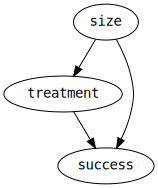

In [14]:
(defmodel charig1968
    {:size []
     :treatment [:size]
     :success [:treatment :size]})

In [15]:
(a/define f
    (a/identify
        charig1968
        (q [:success] :do [:treatment])))

In [34]:
(a/define tmp
    (a/all-bindings
        (select-keys (:support kidney-distribution)
                     #{:success :treatment})))

({:success "yes", :treatment "surgery"} {:success "yes", :treatment "nephrolithotomy"} {:success "no", :treatment "surgery"} {:success "no", :treatment "nephrolithotomy"})

In [36]:
(a/estimate-categorical-formula
    kidney-distribution
    {:sub #{:success} :sum {:p #{:size :treatment}}}
    {:size "small" :treatment "surgery"})

87/350

In [39]:
(float
    (a/estimate-categorical-formula
        kidney-distribution
        f
        {:treatment "surgery"
         :success "yes"}))

0.83254623

In [40]:
(float
    (a/estimate-categorical-formula
        kidney-distribution
        f
        {:treatment "surgery"
         :success "no"}))

0.16745378

In [42]:
(+
    (a/estimate-categorical-formula
        kidney-distribution
        f
        {:treatment "surgery"
         :success "yes"})
    (a/estimate-categorical-formula
        kidney-distribution
        f
        {:treatment "surgery"
         :success "no"}))

1N

In [6]:
(require '[incanter.core :as i]
         '[incanter.datasets :refer [get-dataset]]
         '[clojure.core.matrix.dataset :as md])

In [9]:
(def iris (get-dataset :iris))

#'user/iris

In [13]:
(type (:Sepal.Length (first (md/row-maps iris))))

java.lang.Double